Urban Sound Classification

Data Exploration and Storytelling

After the data wrangling step, all data are stored in a python dictionary with keys as file IDs and values as the discrete sound channel signal. In our dataset, we have 5435 sound files categorized into ten different types or classes. For this report, we will choose a sample size of one file for each class to explore and visualize the sound signal within. The dataset is located in the ./Train/ folder. Randomly chosen sample files from each class were 915(dog_bark), 1873(jackhammer), 5678(air_conditioner), 5289(street_music), 6729(drilling), 522(children_playing), 7046(siren), 6668(car_horn), 2099(engine_idling), 4171(gun_shot).

Using spectrograms and waveplots, we will visualize and explore data features that could help in classifying sound signals. We'll start with signal amplitudes in part 1, followed by signal power or energy analysis in part 2.

We will explore some feature extraction techniques of audio signal data. The purpose of this step is to explore the data, generate interesting features and insights that should help in the classification part of the project.

Extracting features requires us to operate on all files, however in this report we will visualize a subsample of the feature extraction results from the different classes. We will visualize, hypothesize and summarize the plots after. 

Part 1: Waveplots and Spectrograms

A wave plot is defined as a plot of the amplitude of the sound signal versus time. A spectrogram, however, is a plot of the signal's frequencies versus time. Independent axes represent time and frequency while color represents the signal's amplitude of the observed frequency at a certain time. The higher the color intensity, the stronger frequency it is present in the signal. This could be a very important feature in classifying different types of sounds. To plot a spectrogram, we need to compute the Discrete Fourier Transform of the signal to find the frequencies. Since, our signal is a time series, a window frame of a pre-specified size is used for the Fourier Transform. In our experiments, we started with the default window size of 93ms. The resulting spectrogram 2D matrix has frames as rows, frequencies as columns and matrix values are amplitudes in decibels.

In [14]:
import librosa

#Load files
filePaths = ['Train/915.wav', 'Train/1873.wav', 'Train/5678.wav', 'Train/5289.wav',
             'Train/6729.wav', 'Train/522.wav', 'Train/7046.wav', 'Train/6668.wav',
             'Train/2099.wav', 'Train/4171.wav']

def setTitle(i, j):
    if i == 0 and j == 0:
        title = 'dog_bark'
    elif i == 0 and j == 1:
        title = 'jackhammer'
    elif i == 0 and j == 2:
        title = 'air_conditioner'
    elif i == 0 and j == 3:
        title = 'street_music'
    elif i == 0 and j == 4:
        title = 'drilling'
    elif i == 1 and j == 0:
        title = 'children_playing'
    elif i == 1 and j == 1:
        title = 'siren'
    elif i == 1 and j == 2:
        title = 'car_horn'
    elif i == 1 and j == 3:
        title = 'engine_idling'
    else:
        title = 'gun_shot'
    return title



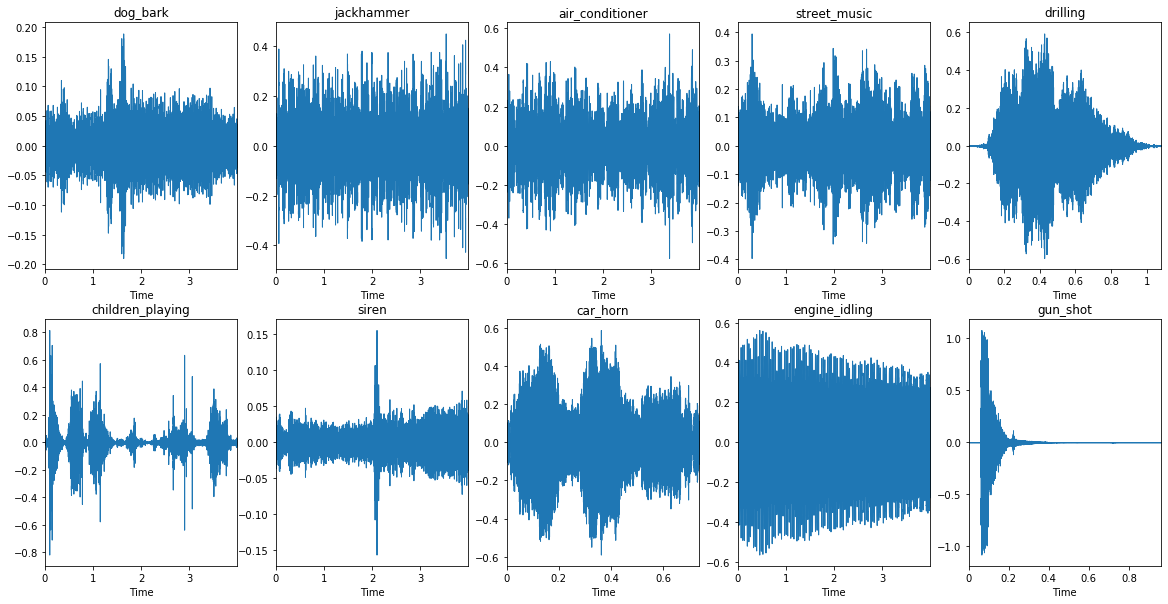

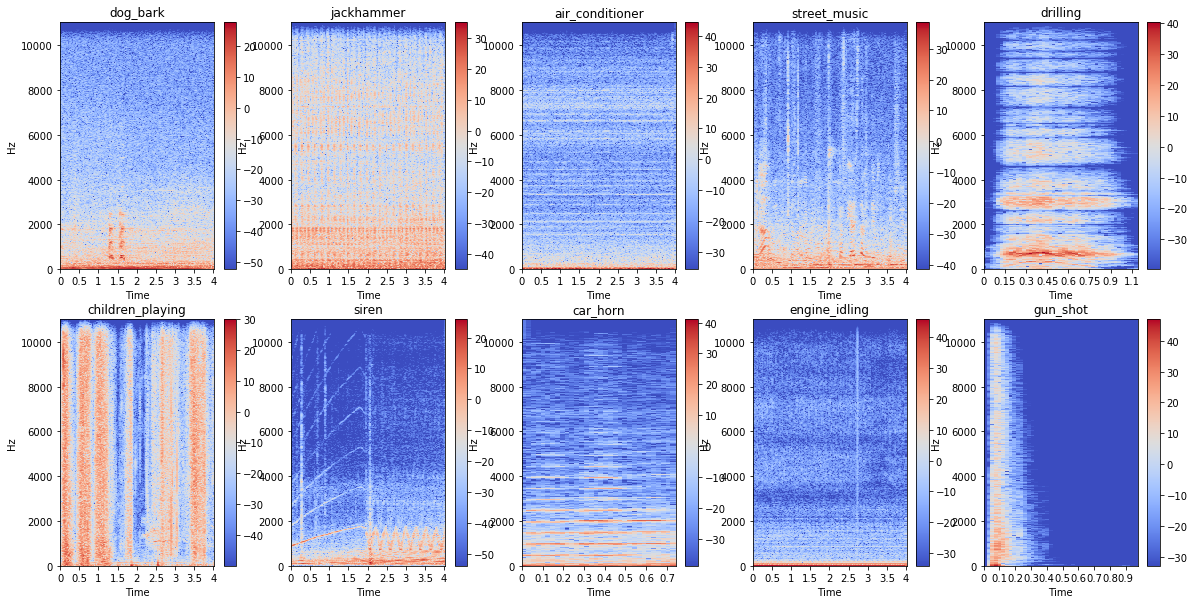

In [15]:
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 10))
i = 0
j = 0
#Display waveform
for f in filePaths:
    #Play audio (optional)
    #ipd.Audio(f)
    sig, sr = librosa.load(f)
    title = setTitle(i, j)
    plt.axes(axs[i, j])
    plt.title(title)
    librosa.display.waveplot(sig, sr=sr)
    if j < 4:
        j = j + 1
    else:
        i = 1
        j = 0

fig, axs = plt.subplots(2, 5, figsize=(20, 10))
i = 0
j = 0

#Display Spectrogram (frequencies and amplitudes vs time)
for f in filePaths:
    sig, sr = librosa.load(f)
    sig_ft = librosa.stft(sig)
    sig_db = librosa.amplitude_to_db(abs(sig_ft))
    title = setTitle(i, j)
    plt.axes(axs[i, j])
    plt.title(title)
    librosa.display.specshow(sig_db, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    if j < 4:
        j = j + 1
    else:
        i = 1
        j = 0


Text(0.5, 1.0, 'Zero Crossing Rate for all samples of all ten classes')

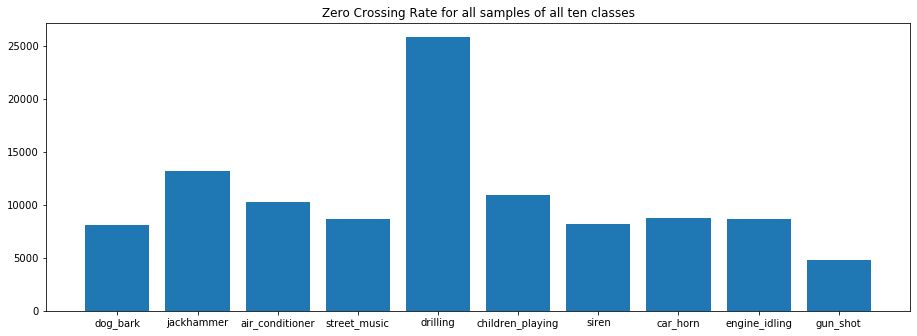

In [16]:
#Zero Crossing Rate (The following code assumes all data is in the python dictionary 'data_dic')
def get_zc_rate(file_index):
    zc_list = []
    for i in file_index:
        both_ch = data_dic[i]
        # Append just the left channel if stereo
        if len(both_channels.shape) > 1:
            one_ch = both_ch[:, 0]
        else:
            one_ch = both_ch
        zc = librosa.zero_crossings(one_ch, pad=False)
        zc_list.append(sum(zc))
    return zc_list

#After calling get_zc_rate for all the files of each class separately, we get the following list
#of mean zero crossing rates:
zc_list = [8087, 13155, 10309, 8697, 25852, 10957, 8227, 8790, 8689, 4830]
class_names = ['dog_bark', 'jackhammer', 'air_conditioner', 'street_music', 'drilling',
               'children_playing', 'siren', 'car_horn', 'engine_idling', 'gun_shot']
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,2,1])
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.bar(class_names, zc_list)
plt.title('Zero Crossing Rate for all samples of all ten classes')


Zooming in on a signal's waveplot, the number of times the signal changes from positive to negative and vice-versa can be quantized as the zero-crossing rate, which is a feature used heavily in sound and music classification. Looking at the above wave plots and spectrograms, it can be seen that the "children playing" spectrogram has the highest rate of change i.e. signal variability, while "engine idling" is the least variable. Just looking at the wave plots of "jackhammer", "air_conditioner" and "street_music", one cannot discern any differences. However, their spectrograms tell a different story. The spectrogram of "jackhammer" is almost high and vertical while that of "air_conditioner" is very low. "street_music" is not as steady as either of the former categories, but is intermittently louder than "air_conditioner". "drilling" almost has a horizontal spectrogram, unlike "street_music" and "children_playing". The spectrogram of "drilling" is closest to that of "car_horn" and "engine_idling", albeit it is louder than both of the former. The spectrograms of "gun_shot" and "dog_bark" are very impulse-like as is that of "siren" that has a delayed impulse start but is steady after that, similar to "jackhammer". Here, impulse-like refers to the brief time duration the frequencies are present in the signal. "dog_bark" has a lot more random noise in its signal over time than "gun_shot".

(173,)
(173,)
(173,)
(173,)
(173,)
(173,)
(173,)
(173,)
(173,)
(173,)


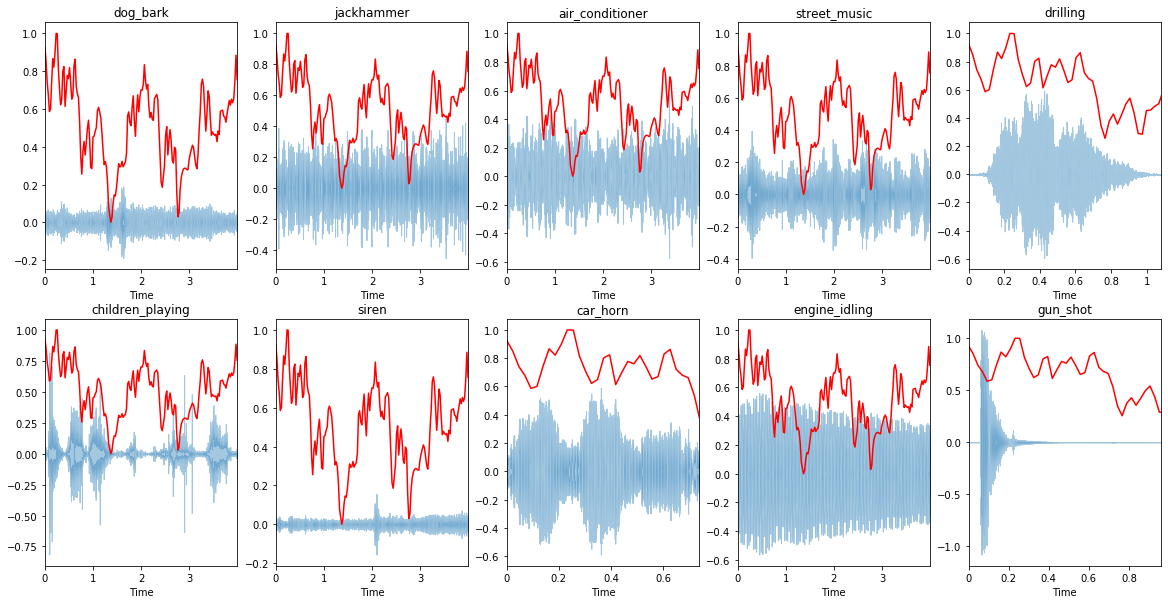

In [65]:
#Spectral Centroid
import sklearn

#Plot waveform along with spectral centroid data, need to normalize the spectral centroids
#against the waveform scale first
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

fig, axs = plt.subplots(2, 5, figsize=(20, 10))
i = 0
j = 0
for f in filePaths:
    sig, sr = librosa.load(f)
    spec_cen = librosa.feature.spectral_centroid(sig, sr=sr)
    spec_cen_t = sc[0] #transposed sc 
    print(sc_t.shape)
    numframes = range(len(spec_cen_t))
    t = librosa.frames_to_time(numframes)
    title = setTitle(i, j)
    plt.axes(axs[i, j])
    plt.title(title)
    librosa.display.waveplot(sig, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spec_cen_t), color='r')
    if j < 4:
        j = j + 1
    else:
        i = 1
        j = 0

A statistical feature used in sound signal analysis is the spectral centroid. It is defined as the weighted mean of frequencies present in a signal frame. In other words, it could be explained as the center of mass of the sound signal in a given time frame. Just looking at the above plots, we can cluster them into two groups, one group includes "car_horn", "gun_shot" and "drilling" and the other group has the rest.

Part 2: Power or Energy Spectrum

A spectral roll-off is defined as the frequency of the signal at which 85% of the spectral energy is bounded.

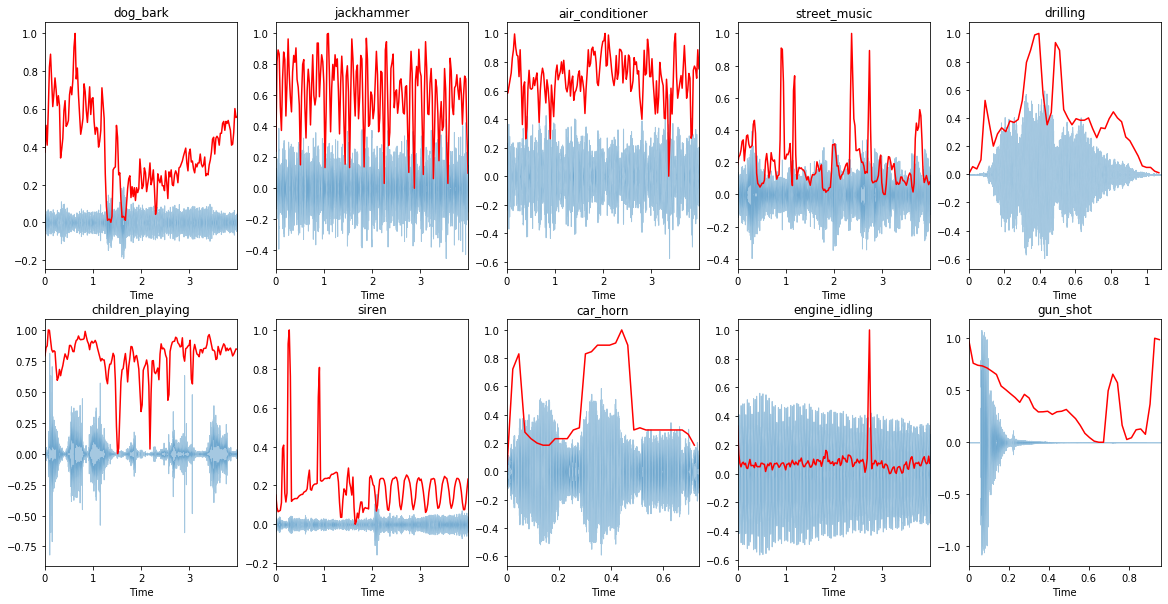

In [67]:
#Spectral Rolloff

fig, axs = plt.subplots(2, 5, figsize=(20, 10))
i = 0
j = 0
for f in filePaths:
    sig, sr = librosa.load(f)
    spec_rf = librosa.feature.spectral_rolloff(sig, sr=sr)[0]
    numframes = range(len(spec_rf))
    t = librosa.frames_to_time(numframes)
    title = setTitle(i, j)
    plt.axes(axs[i, j])
    plt.title(title)
    librosa.display.waveplot(sig, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spec_rf), color='r')
    if j < 4:
        j = j + 1
    else:
        i = 1
        j = 0

In the visualization above, the red curves represent the computed spectral rolloffs for each time frame for each sample.

The power spectral density of a signal could be represented as a set of discrete coefficients known as the Mel-Frequency Cepstral Coefficients. These coefficients could be used as a feature for sound identification that are mapped to the nonlinear mel scale that approximates the human auditory system.

(20, 173)
(20, 173)
(20, 173)
(20, 173)
(20, 47)
(20, 173)
(20, 173)
(20, 32)
(20, 173)
(20, 42)


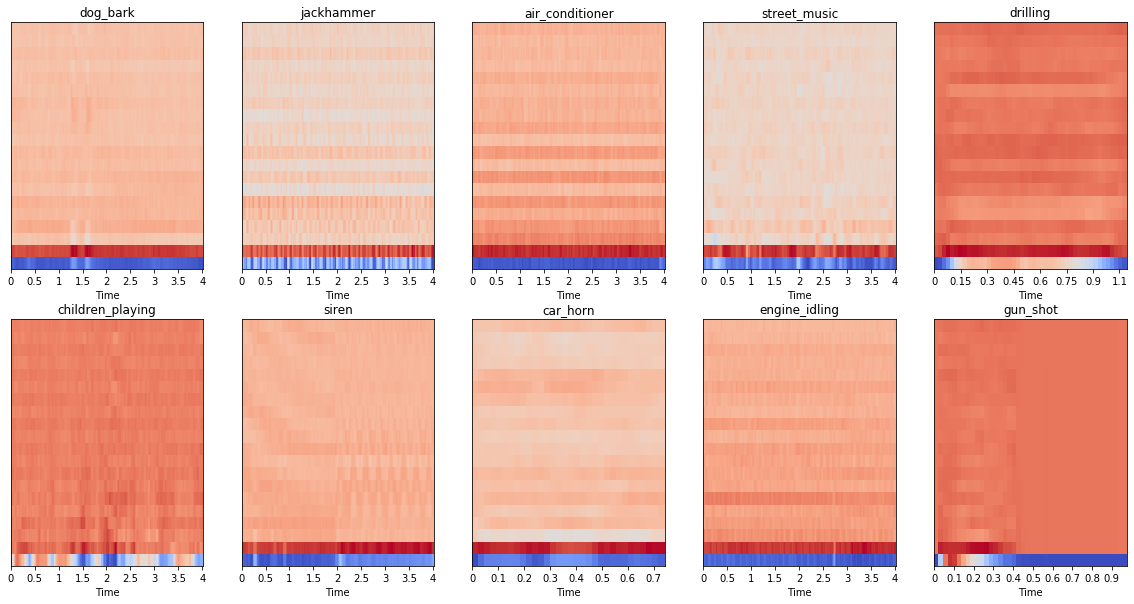

In [68]:
#MFCC

fig, axs = plt.subplots(2, 5, figsize=(20, 10))
i = 0
j = 0
for f in filePaths:
    sig, sr = librosa.load(f)
    mfccoeff = librosa.feature.mfcc(sig, sr=sr)
    print(mfccoeff.shape)
    #Display the MFCCs
    title = setTitle(i, j)
    plt.axes(axs[i, j])
    plt.title(title)
    librosa.display.specshow(mfccoeff, sr=sr, x_axis='time')
    if j < 4:
        j = j + 1
    else:
        i = 1
        j = 0

The above visualization is a representation of 20 MFCC features computed for frames of each sample.

Conclusion:

In this report, we have explained and visualized some features most commonly used in sound signal analysis. We computed these features on a sample of signals from our training dataset. By visualizing the sound data, we could definitely discern distinguishable features between sound classes. In the next report, we will express these findings in a more statistical framework.